## Project: Customer Segmentation Using Clustering (K-Means)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading/importing Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Describing our Dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Checking Shape of our Dataset
df.shape

(200, 5)

In [5]:
# Checking Datatypes of all columns
df.dtypes 

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Droping the 'CusomerID' column because we don't need it.
df.drop(['CustomerID'], axis=1, inplace=True)

In [7]:
# Checking that 'CustomerID' column is removed or not
df.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_16368\3795512421.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_16368\3795512421.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\Ali Raza\AppData\Lo

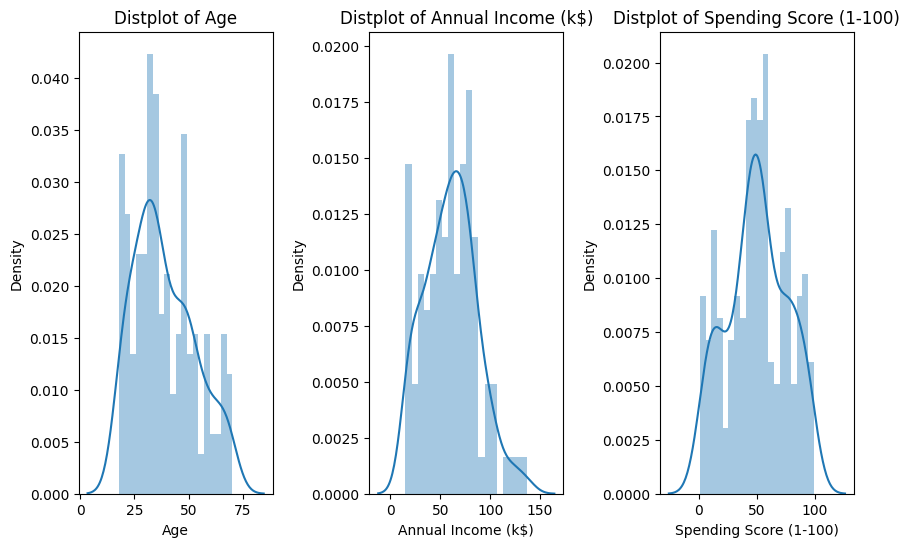

In [8]:
# Creating Distribution plots for ['Age' ,'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(1, figsize = (10, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title("Distplot of {}".format(x))
plt.show()    

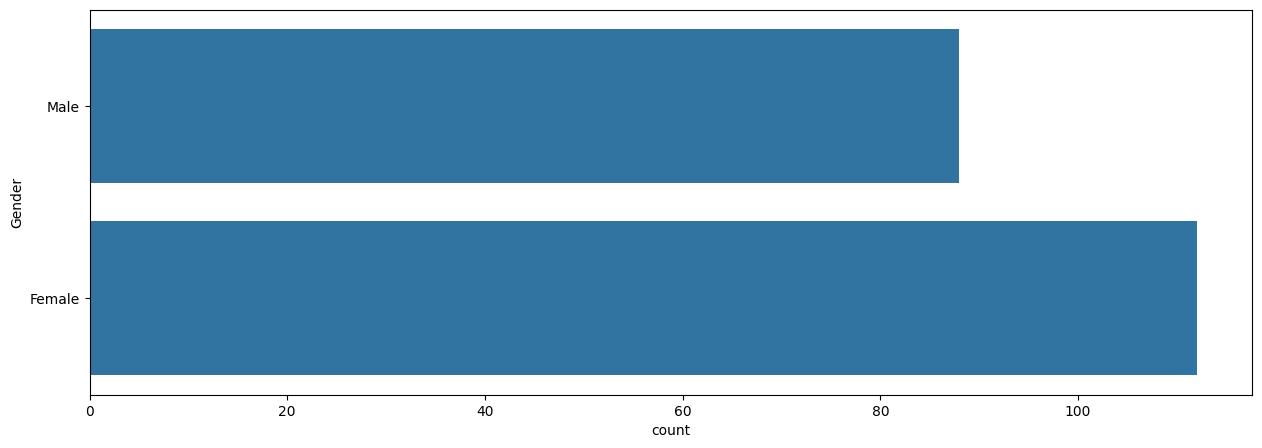

In [9]:
# Creating Countplot of 'Gender' column
plt.figure(figsize = (15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

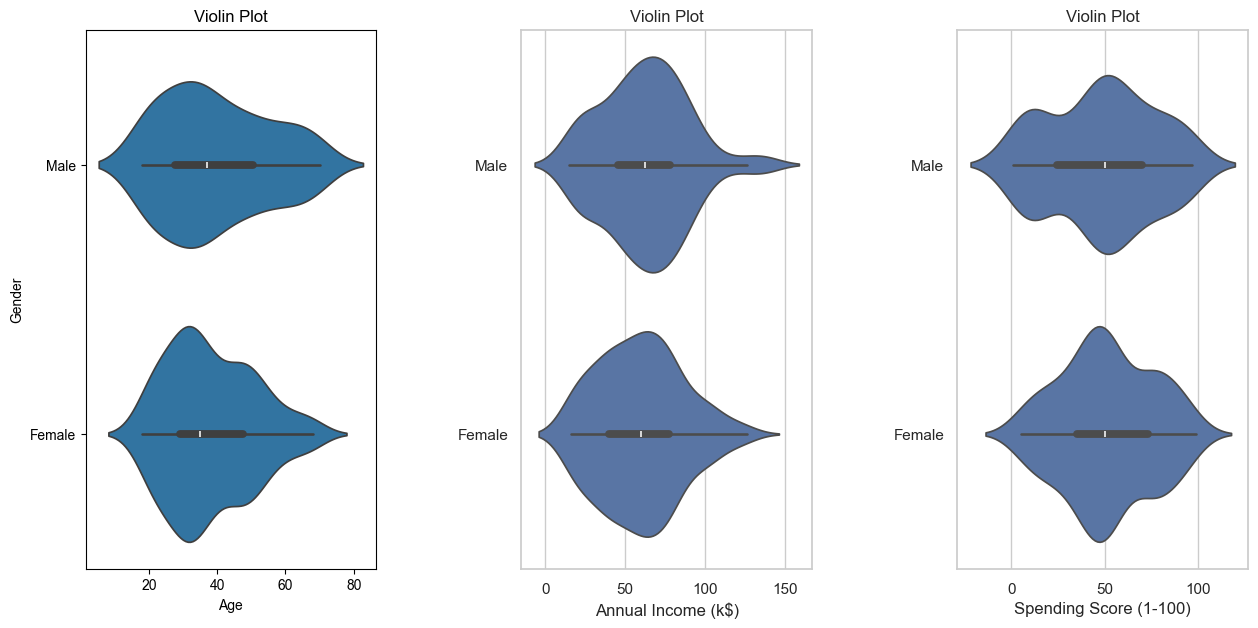

In [10]:
# Creating violin plots for [x = 'Age' ,'Annual Income (k$)', 'Spending Score (1-100)' and y = 'Gender'] 
plt.figure(1,figsize = (15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1, 3, n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()    
    

C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_16368\103517534.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = agex,y = agey, palette = 'mako')


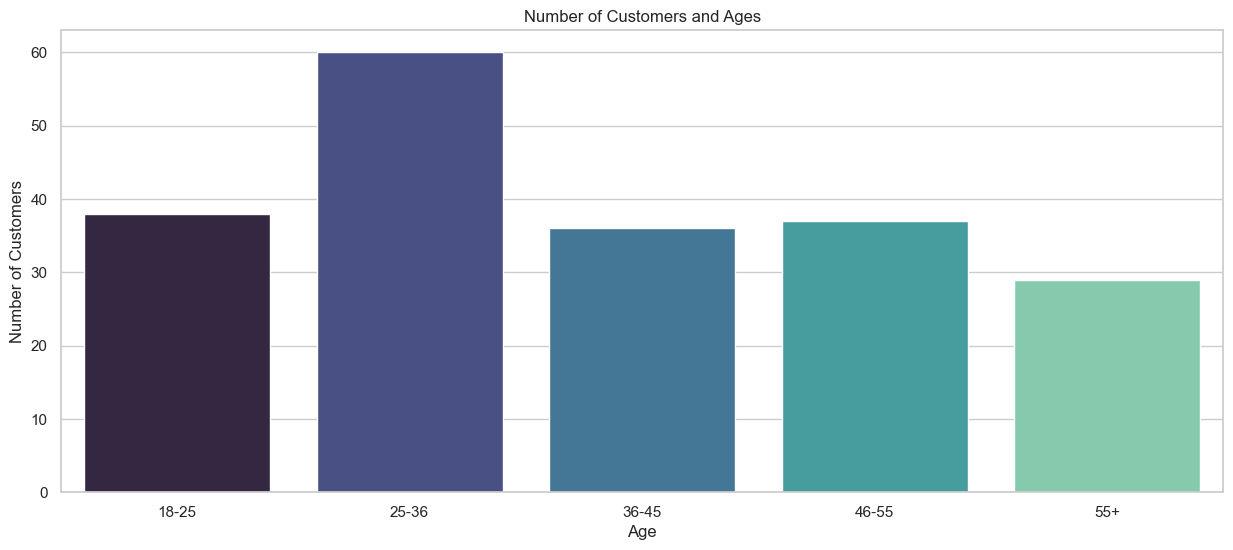

In [11]:
# Dividing 'Age' into different categories and visualizing them 
age_18_25 = df.Age[(df.Age >=18) & (df.Age <=25)]
age_26_36 = df.Age[(df.Age >=26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <=55)]
age_55above = df.Age[df.Age >=56]

agex = ['18-25', '25-36', '36-45', '46-55', '55+']
agey = [len(age_18_25.values), len(age_26_36.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

# Now for visualizing them we are using Barplots
plt.figure(figsize = (15, 6)) 
sns.barplot(x = agex,y = agey, palette = 'mako')
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

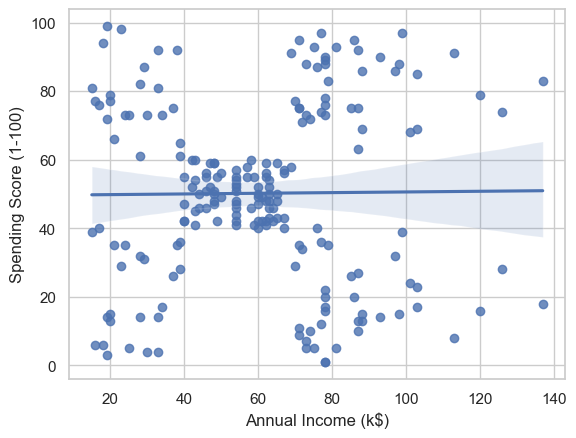

In [12]:
# Visualizing relationship of 'Annual Income (k$)' and 'Spending Score (1-100)'ArithmeticError
sns.regplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_16368\1851187306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ssx, y = ssy, palette = 'rocket')


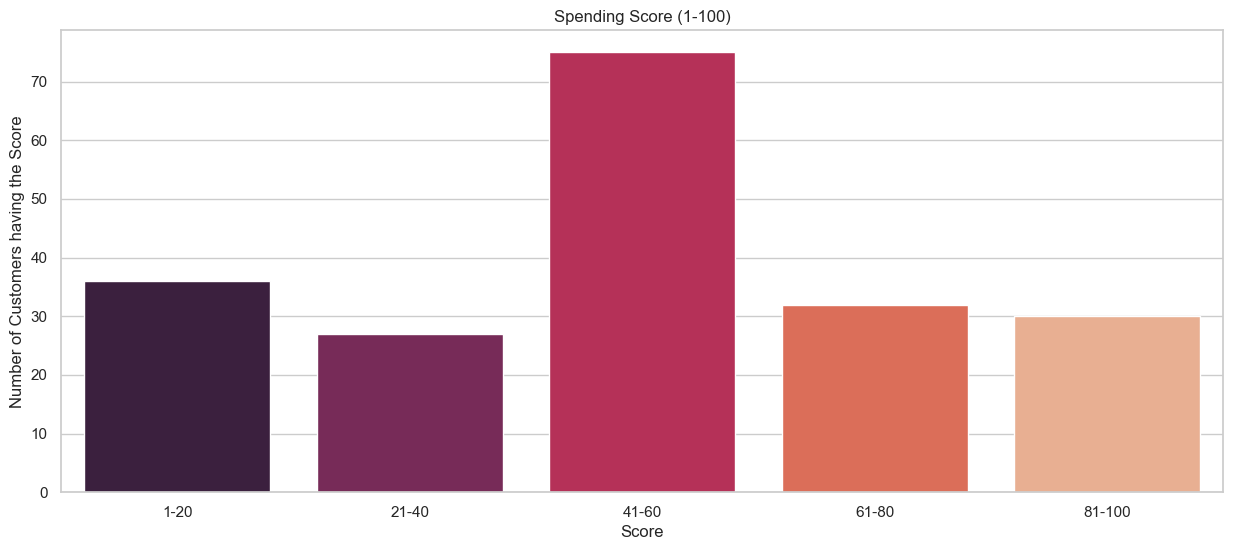

In [13]:
# Dividing 'Spending Score (1-100)' in different categories and visualizing them
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=1) & (df['Spending Score (1-100)'] <=20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ['1-20', '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

# Now for visualizing them we are using Barplots
plt.figure(figsize = (15, 6))
sns.barplot(x = ssx, y = ssy, palette = 'rocket')
plt.title("Spending Score (1-100)")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the Score")
plt.show() 

C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_16368\382473340.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = aix, y = aiy, palette = 'Spectral')


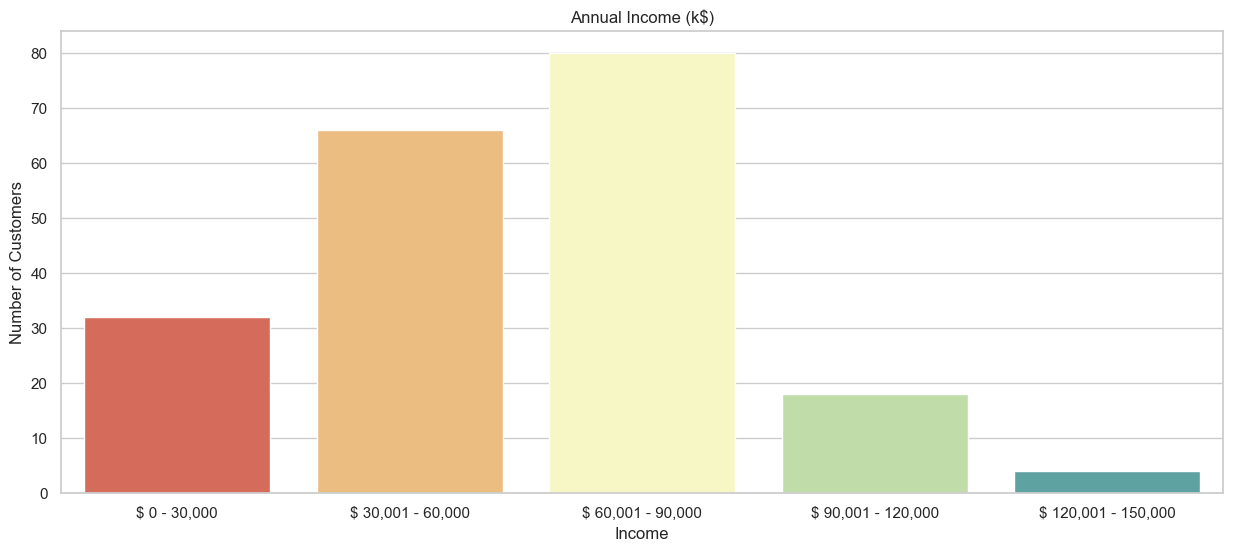

In [14]:
# Dividing 'Annual Income (k$)' in different categories and visualizing them
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

aix = ['$ 0 - 30,000', '$ 30,001 - 60,000', '$ 60,001 - 90,000', '$ 90,001 - 120,000', '$ 120,001 - 150,000']
aiy = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]


# Now for visualizing them we are using Barplots
plt.figure(figsize = (15, 6))
sns.barplot(x = aix, y = aiy, palette = 'Spectral')
plt.title("Annual Income (k$)")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

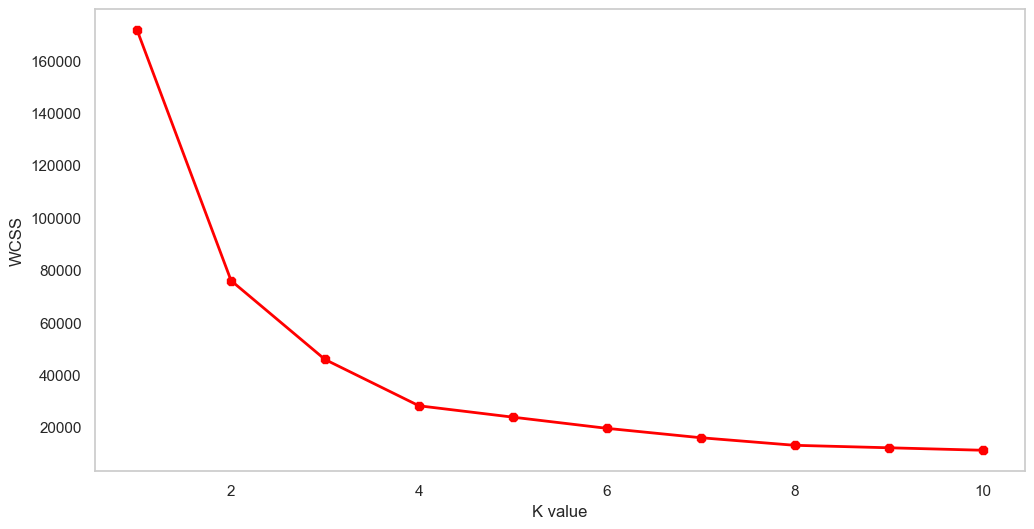

In [15]:
# Performming Clustring on 'Age' and 'Spending Score (1-100)'
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("K value")
plt.ylabel('WCSS')
plt.show()    
    


In [16]:
# Now we are putting the value of k = 4
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)
print(label)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [17]:
# Checking Centroids
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.40816327 48.04081633]
 [27.32608696 49.36956522]]


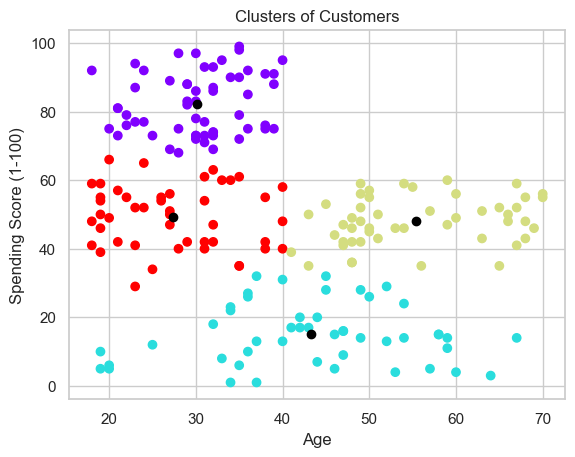

In [18]:
# Visualizing our clusters of 'Age' and 'Spending Score (1-100)' by making scatter plot
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black')
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

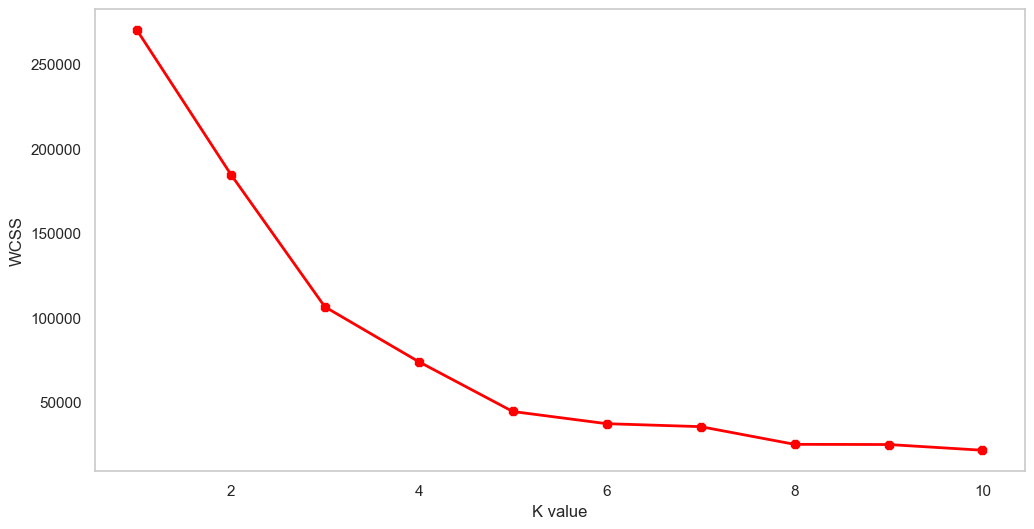

In [19]:
# Performming Clustring on 'Annual Income (k$)' and 'Spending Score (1-100)'
X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("K value")
plt.ylabel('WCSS')
plt.show() 

In [20]:
# Now we are putting the value of k = 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 42)
label = kmeans.fit_predict(X2)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [21]:
# Checking Centroids of clusters
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


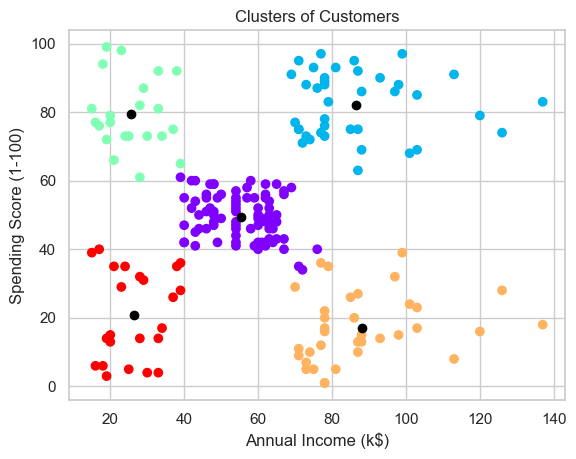

In [22]:
# Visualizing our clusters of 'Annual Income (k$)' and 'Spending Score (1-100)' by making scatter plot
plt.scatter(X2[:, 0], X2[:, 1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

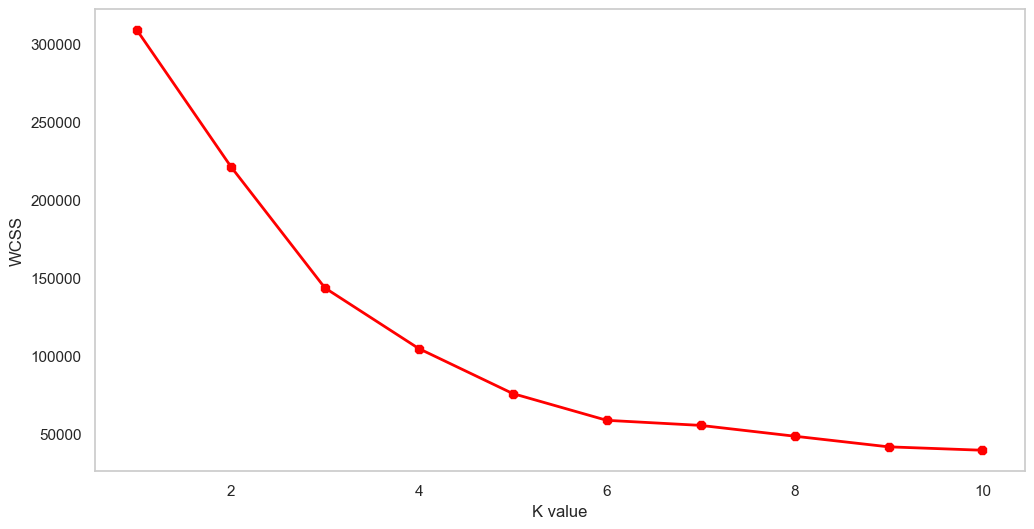

In [23]:
# Performming Clustring on 'Age','Annual Income (k$)' and 'Spending Score (1-100)'
X3 = df.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("K value")
plt.ylabel('WCSS')
plt.show() 

In [24]:
# Now we are putting the value of k = 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 42)
label = kmeans.fit_predict(X3)
print(label)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 0 0 4 0 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [25]:
# Checking Centroids of clusters
print(kmeans.cluster_centers_)

[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]


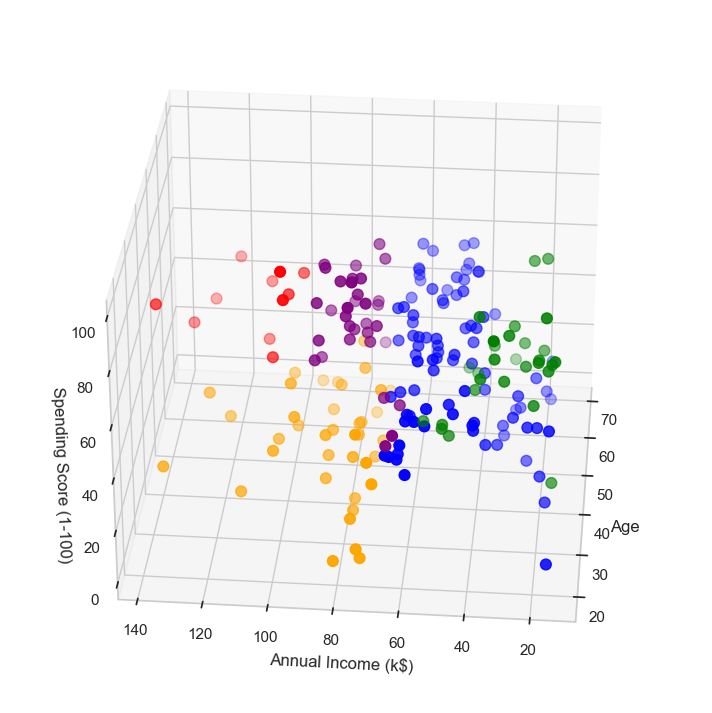

In [26]:
# Visualizing our clusters of 'Age', 'Annual Income (k$)' and 'Spending Score (1-100)' by making 3-D plot
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], c = 'purple', s = 60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()